<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/control_parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sistemas de Control con Python parte 1

In [1]:
from scipy.signal import lti
import matplotlib.pyplot as plt


In [2]:
num = [1,1]
den = [1,2,1]
sys = lti(num,den)


In [3]:
sys

TransferFunctionContinuous(
array([1., 1.]),
array([1., 2., 1.]),
dt: None
)

In [4]:
t,y = sys.step()

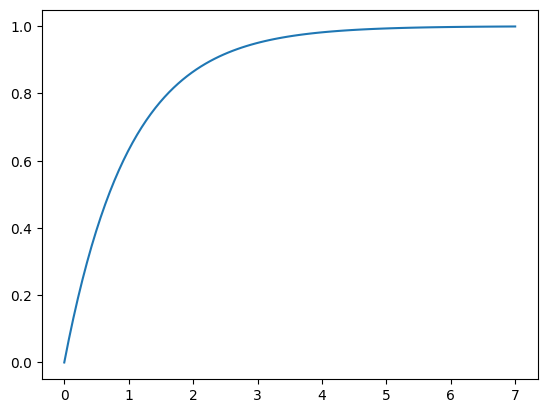

In [5]:
plt.plot(t,y)
plt.show()

Parte 2

In [6]:
import sympy as sy

In [7]:
s = sy.symbols('s')
num = sy.Poly(sys.num,s)
den = sy.Poly(sys.den,s)
num/den

(1.0*s + 1.0)/(1.0*s**2 + 2.0*s + 1.0)

In [8]:
sy.simplify(num/den)

1.0/(s + 1)

vamos a hacerlo pero como funcion

In [9]:
def pretysys(sys):
    s = sy.symbols('s')
    num = sy.Poly(sys.num,s)
    den = sy.Poly(sys.den,s)
    return sy.simplify(num/den)

In [10]:
sys2 = lti([2],[1,2,3])

In [11]:
pretysys(sys2)

2.0/(1.0*s**2 + 2.0*s + 3.0)

In [12]:
import numpy as np


In [13]:
def serie(sys1,sys2):
  num = np.polymul(sys1.num,sys2.num)
  den = np.polymul(sys1.den,sys2.den)
  return lti(num,den)

In [14]:
a = lti([2],[1,2])
b = lti([1],[1,2,3])

In [15]:
serie(a,b)

TransferFunctionContinuous(
array([2.]),
array([1., 4., 7., 6.]),
dt: None
)

In [16]:
pretysys(serie(a,b))  # para una mejor presentacion

2.0/(1.0*s**3 + 4.0*s**2 + 7.0*s + 6.0)

funcion_t_camino_directo = $G(s)$



funcion_t_retro = $H(s)$

$$GH(s) =\frac{G(s)}{1+G(s)\cdot H(s)} =\frac{GN\cdot HD}{GN\cdot HN+GD\cdot HD}$$

In [17]:
def feedback(sys1,sys2):
  num = np.polymul(sys1.num,sys2.den)
  a = np.polymul(sys1.num,sys2.num)
  b = np.polymul(sys1.den,sys2.den)
  den = np.polyadd(a,b)
  return lti(num,den)


In [18]:
feedback(a,b)


TransferFunctionContinuous(
array([2., 4., 6.]),
array([1., 4., 7., 8.]),
dt: None
)

In [19]:
pretysys(feedback(a,b))

(2.0*s**2 + 4.0*s + 6.0)/(1.0*s**3 + 4.0*s**2 + 7.0*s + 8.0)